# 04. PyTorch Custom Datasets Video Notebook

We've used some datasets with PyTorch Before.

But how do you get your own data into PyTorch?

One of the ways to do so is via: datasets

## Domain libraries

### 1. Get data

New important point:
* zipfile


In [6]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it
if image_path.is_dir():
  print(f"{image_path} directory already exist, skipping it ......")
else:
  print(f"{image_path} directory already exist, creating it ......")
  image_path.mkdir(parents=True, exist_ok=True)

dataset_zip = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  print("Downloading pizza, steak, sushi image for our dataset....")
  f.write(dataset_zip.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping the downloaded file ...... ")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exist, skipping it ......
Unzipping the downloaded file ...... 


In [9]:
import os
def work_through_file(dir_path):
  """
  TODO: Walks through dir_path returning its contents.
  Args:
    dir_path(str or pathlib.Path): target directory
  Returns:
    A Print out of:
      number of subdirectories in dir_path
      number of image in each subdirectory
      name of each subdirectory
  """

  for dirpath, dirnames, filenames in os.walk(dir_path):
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in path:{dirpath}")

In [10]:
work_through_file(image_path)

There are 2 directories and 0 images in path:data/pizza_steak_sushi
There are 3 directories and 0 images in path:data/pizza_steak_sushi/train
There are 0 directories and 78 images in path:data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in path:data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in path:data/pizza_steak_sushi/train/steak
There are 3 directories and 0 images in path:data/pizza_steak_sushi/test
There are 0 directories and 25 images in path:data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in path:data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in path:data/pizza_steak_sushi/test/steak


## 2.1 Visualizing and image
Let's write some code to:



1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Open the image
  *  with **PIL**
  *  with `matplotlib.pyplot`: At first, you have to convert the image into array from 'jpg' using `np.asarray`


sushi
random image path: data/pizza_steak_sushi/train/sushi/821108.jpg
Image class: sushi
Image height: 383
Image width: 512


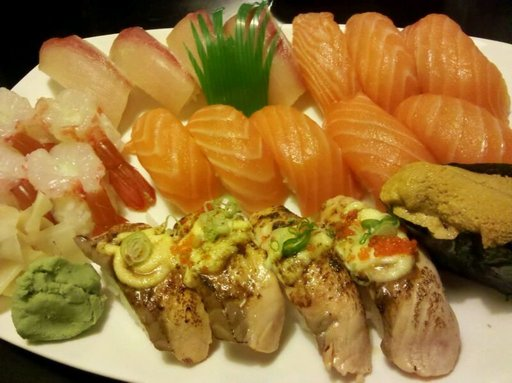

In [55]:
import random
from PIL import Image

# Set the ramdom seed
#random.seed(42)

# Get all image path(* means any combination)
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# open the image
img = Image.open(random_image_path)

# Take a look the image and metadata
print(f"random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


In [ ]:
# Visualize the image with matplotlib.pyplot

The class is sushi | Image shape: (382, 512, 3)


(-0.5, 511.5, 381.5, -0.5)

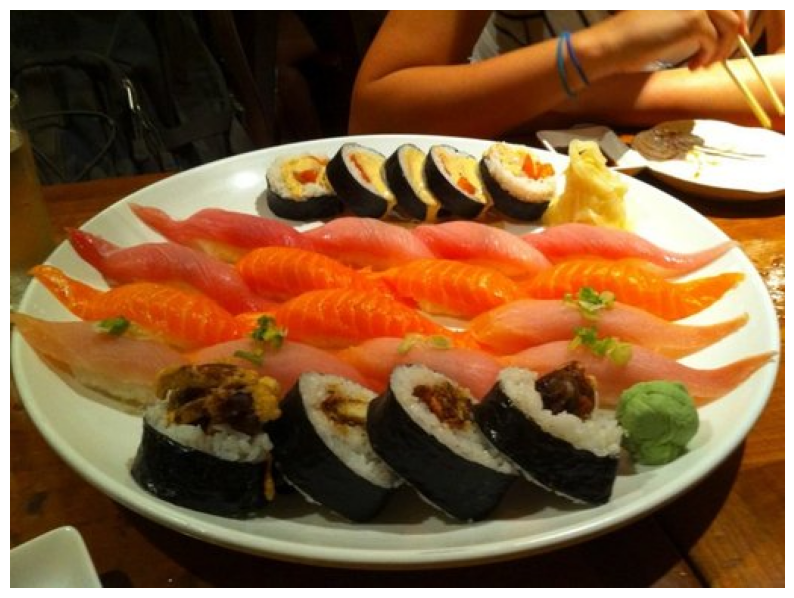

In [18]:
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.asarray(img)
plt.figure(figsize=(10,8))
plt.imshow(img)
print(f"The class is {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

# 3. Transforming data

Before we can use our image with PyTorch:
1. Turn your target data into tensors
2. Turn it into a `torch.untils.data.Dataset` and subsequently a `DataLoader`

In [19]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [27]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the image to 64 * 64
    transforms.Resize(size=(64, 64)),
    # Filp the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # tranform our image to tensor
    transforms.ToTensor()
])

In [35]:
img_tensor=data_transform(img).permute(1, 2, 0)
img_tensor.shape

torch.Size([64, 64, 3])

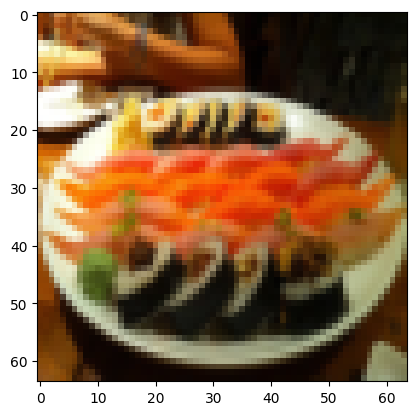

In [36]:
plt.imshow(img_tensor)

## 3.1 Visualize what's happenin' after we tranform the image to tensor

In [62]:
def plot_transform_image(image_path,
                         transform,
                         n,
                         seed=None):
  if seed:
    random.seed(42)
  random_choice = random.sample(image_path, k=n)
  for choice in random_choice:
    with Image.open(choice) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].set_title(f"oringal\nSize:{f.size}")

      ax[0].imshow(f)
      ax[0].axis(False)

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      choice_tensor = transform(f).permute(1, 2, 0)
      ax[1].imshow(choice_tensor)
      ax[1].set_title(f"transformed image\nShape:{choice_tensor.shape}")
      ax[1].axis(False)




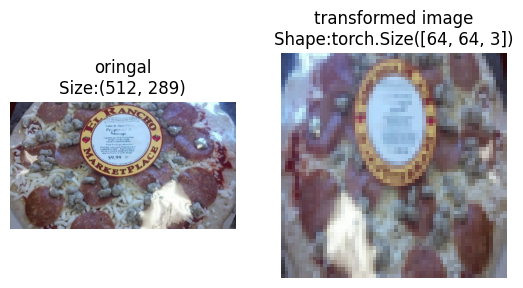

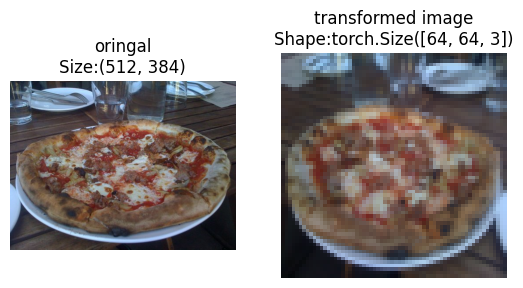

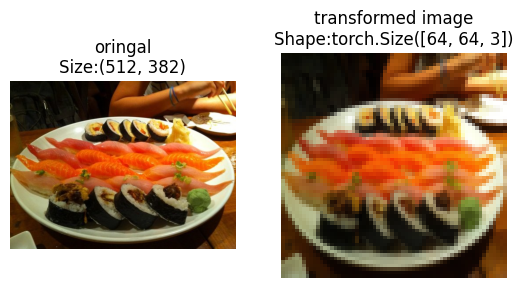

In [63]:
plot_transform_image(image_path_list,
                     transform=data_transform,
                     n=3,
                     seed=42)